Задание №1

Processing normal distribution


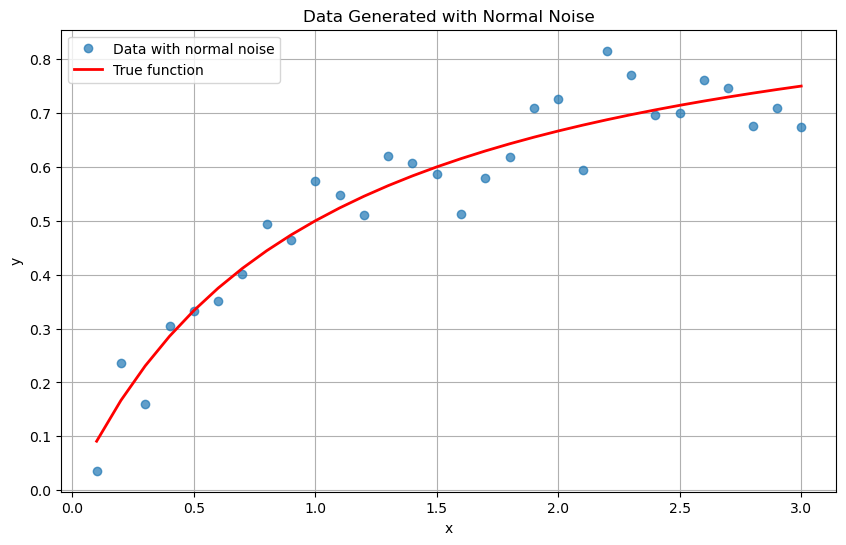

Processing uniform distribution


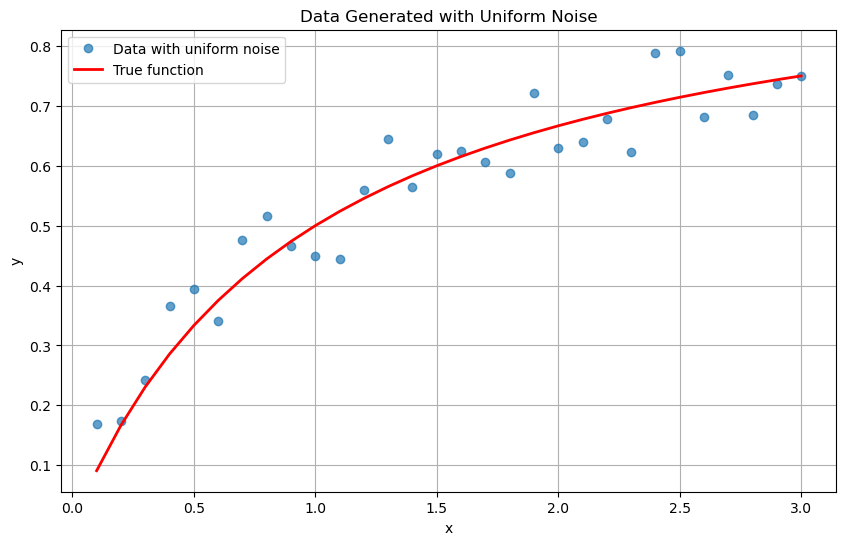

Processing laplace distribution


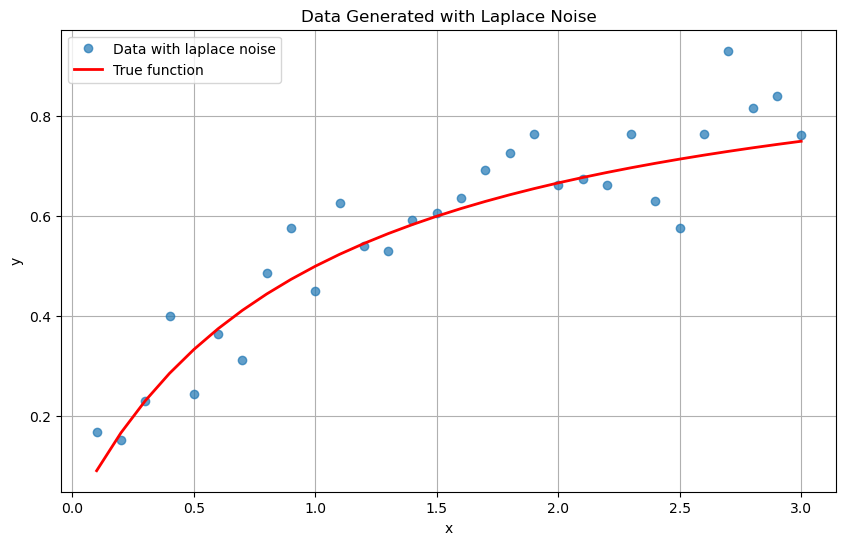

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# === Функция f(x, a) ===
def f(x, a):
    a0, a1, a2 = a
    return (a1 * x + a0) / (x + a2)

# === Генерация случайной погрешности ===
def generate_noise(dist_type, size, std_dev):
    if dist_type == 'normal':
        return np.random.normal(0, std_dev, size)
    elif dist_type == 'uniform':
        return np.random.uniform(-std_dev * (3**0.5), std_dev * (3**0.5), size)
    elif dist_type == 'laplace':
        lambda_param = 1 / np.sqrt(2 * std_dev**2)  # Расчет параметра lambda для распределения Лапласа
        return np.random.laplace(0, 1 / lambda_param, size)
    else:
        raise ValueError("Unsupported distribution type")

# === Генерация данных ===
def generate_data(x, a, dist_type, noise_std_dev):
    noise = generate_noise(dist_type, len(x), noise_std_dev)
    return f(x, a) + noise

# === Основной блок программы ===
# Параметры функции и расчетов
x = np.arange(0.1, 3.1, 0.1)  # Значения x_i
params = (0.0, 1.0, 1.0)      # Параметры a = (a0, a1, a2)
noise_std_dev = 0.05          # Среднеквадратичное отклонение шума

# Типы распределений погрешности
distribution_types = ['normal', 'uniform', 'laplace']

# Генерация и визуализация данных для каждого типа распределения
for dist_type in distribution_types:
    print(f"Processing {dist_type} distribution")
    y = generate_data(x, params, dist_type, noise_std_dev)

    # Визуализация результатов
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'o', label=f'Data with {dist_type} noise', alpha=0.7)
    plt.plot(x, f(x, params), label='True function', color='red', linewidth=2)
    plt.title(f'Data Generated with {dist_type.capitalize()} Noise')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.show()


Задание №2

Processing normal distribution
Normal noise:
  OLS Params: [0.21228247 0.21859778], Variance: 9.970790792794137e-06
  LAR Params: [0.         0.         0.29126975], Variance: 0.018852903598379614
  Minimax Params: [1.04891312e-03 1.09096658e+00 1.25716334e+00], Variance: 0.3103739278664663
Processing uniform distribution
Uniform noise:
  OLS Params: [0.22958039 0.20509866], Variance: 0.00014983881115710797
  LAR Params: [0.         0.01586026 0.27847768], Variance: 0.016307697758020084
  Minimax Params: [9.65783194e-05 1.17493552e+00 1.46924692e+00], Variance: 0.40280760644820396
Processing laplace distribution
Laplace noise:
  OLS Params: [0.21905035 0.21585468], Variance: 2.553081356114244e-06
  LAR Params: [0.         0.00533303 0.28923232], Variance: 0.01825361963584209
  Minimax Params: [-9.98289624e-03  5.17273252e+00  1.03970862e+01], Variance: 18.051277430880244


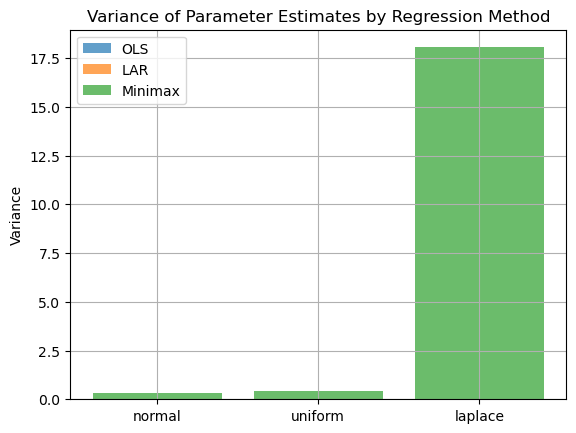

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from scipy import optimize
import statsmodels.api as sm

# === Функция f(x, a) ===
def f(x, a):
    a0, a1, a2 = a
    return (a1 * x + a0) / (x + a2)

# === Генерация случайной погрешности ===
def generate_noise(dist_type, size, std_dev):
    if dist_type == 'normal':
        return np.random.normal(0, std_dev, size)
    elif dist_type == 'uniform':
        return np.random.uniform(-std_dev * (3**0.5), std_dev * (3**0.5), size)
    elif dist_type == 'laplace':
        lambda_param = 1 / np.sqrt(2 * std_dev**2)  # Расчет параметра lambda для распределения Лапласа
        return np.random.laplace(0, 1 / lambda_param, size)
    else:
        raise ValueError("Unsupported distribution type")

# === Генерация данных ===
def generate_data(x, a, dist_type, noise_std_dev):
    noise = generate_noise(dist_type, len(x), noise_std_dev)
    return f(x, a) + noise

# === Методы регрессии ===
# OLS регрессия
def ols_regression(x, y):
    X = sm.add_constant(x)  # Добавляем свободный член
    model = sm.OLS(y, X).fit()
    params = model.params
    variance = np.var(params)
    return params, variance

# LAR регрессия (Lasso)
def lar_regression(x, y, alpha=0.1):
    X = np.vstack([np.ones_like(x), x]).T  # Матрица признаков
    model = Lasso(alpha=alpha, fit_intercept=False)
    model.fit(X, y)
    params = [model.intercept_, model.coef_[0], model.coef_[1]]
    variance = np.var(params)
    return np.array(params), variance

# Минимакс регрессия
def minimax_regression(x, y, initial_params):
    def minimax_loss(params):
        y_pred = f(x, params)
        return np.max(np.abs(y - y_pred))

    result = optimize.minimize(minimax_loss, initial_params, method='Nelder-Mead')
    params = result.x
    variance = np.var(params)
    return params, variance

# === Основной блок программы ===
# Параметры функции и расчетов
x = np.arange(0.1, 3.1, 0.1)  # Значения x_i
params_true = (0.0, 1.0, 1.0)  # Истинные параметры a = (a0, a1, a2)
noise_std_dev = 0.05          # Среднеквадратичное отклонение шума

# Типы распределений погрешности
distribution_types = ['normal', 'uniform', 'laplace']

# Применение методов регрессии к каждому распределению
results = {}
for dist_type in distribution_types:
    print(f"Processing {dist_type} distribution")
    y = generate_data(x, params_true, dist_type, noise_std_dev)

    # OLS
    params_ols, variance_ols = ols_regression(x, y)

    # LAR
    params_lar, variance_lar = lar_regression(x, y)

    # Минимакс
    params_minimax, variance_minimax = minimax_regression(x, y, initial_params=params_true)

    # Сохранение результатов
    results[dist_type] = {
        'OLS': {'params': params_ols, 'variance': variance_ols},
        'LAR': {'params': params_lar, 'variance': variance_lar},
        'Minimax': {'params': params_minimax, 'variance': variance_minimax}
    }

    # Вывод результатов
    print(f"{dist_type.capitalize()} noise:")
    print(f"  OLS Params: {params_ols}, Variance: {variance_ols}")
    print(f"  LAR Params: {params_lar}, Variance: {variance_lar}")
    print(f"  Minimax Params: {params_minimax}, Variance: {variance_minimax}")

# Визуализация дисперсий
for method in ['OLS', 'LAR', 'Minimax']:
    variances = [results[dist_type][method]['variance'] for dist_type in distribution_types]
    plt.bar(distribution_types, variances, alpha=0.7, label=method)

plt.title("Variance of Parameter Estimates by Regression Method")
plt.ylabel("Variance")
plt.legend()
plt.grid()
plt.show()


Задание №3

In [5]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import Lasso

# === Функция f(x, a) ===
def f(x, a):
    a0, a1, a2 = a
    return (a1 * x + a0) / (x + a2)

# === Основные параметры ===
a = (0.0, 1.0, 1.0)  # Истинные параметры
N = 30  # Размер выборки
num_simulations = 103  # Количество симуляций
outliers_count = [1, 2, 3]  # Количество выбросов для добавления
noise_std_dev = 0.05  # Стандартное отклонение шума
outliers_stayed = {k: {'OLS': 0, 'LAR': 0} for k in outliers_count}  # Для подсчета случаев выбросов

# === Основной цикл симуляции ===
for k in outliers_count:
    for _ in range(num_simulations):
        # Генерация значений x_i
        x = np.arange(0.1, 3.1, 0.1)
        
        # Генерация нормального шума
        epsilon_normal = np.random.normal(0, noise_std_dev, N)
        y_normal = f(x, a) + epsilon_normal

        # Вычисление квантилей выбросов
        q95 = np.percentile(y_normal, 95)
        q99 = np.percentile(y_normal, 99)
        q999 = np.percentile(y_normal, 99.9)

        # Создание выбросов
        outliers = np.random.choice([q95, q99, q999], k, replace=False)

        # Добавление выбросов случайным образом
        outlier_indices = np.random.choice(range(N), k, replace=False)
        y_with_outliers = np.copy(y_normal)
        y_with_outliers[outlier_indices] = outliers

        # === OLS ===
        X = sm.add_constant(x)  # Добавляем свободный член
        model_ols = sm.OLS(y_with_outliers, X).fit()
        residuals_ols = model_ols.resid
        if any(np.abs(residuals_ols) > 3 * np.std(residuals_ols)):  # Проверка на выбросы
            outliers_stayed[k]['OLS'] += 1

        # === LAR (Lasso) ===
        X_lar = np.vstack([np.ones_like(x), x]).T  # Матрица признаков
        model_lar = Lasso(alpha=0.1, fit_intercept=False)
        model_lar.fit(X_lar, y_with_outliers)
        predictions_lar = model_lar.predict(X_lar)
        residuals_lar = y_with_outliers - predictions_lar
        if any(np.abs(residuals_lar) > 3 * np.std(residuals_lar)):  # Проверка на выбросы
            outliers_stayed[k]['LAR'] += 1

# === Вывод результатов ===
for k in outliers_count:
    print(f"Количество выбросов: {k}")
    print(f"  OLS: случаев, когда хотя бы один выброс остался: {outliers_stayed[k]['OLS']} из {num_simulations}")
    print(f"  LAR: случаев, когда хотя бы один выброс остался: {outliers_stayed[k]['LAR']} из {num_simulations}")


Количество выбросов: 1
  OLS: случаев, когда хотя бы один выброс остался: 47 из 103
  LAR: случаев, когда хотя бы один выброс остался: 60 из 103
Количество выбросов: 2
  OLS: случаев, когда хотя бы один выброс остался: 60 из 103
  LAR: случаев, когда хотя бы один выброс остался: 90 из 103
Количество выбросов: 3
  OLS: случаев, когда хотя бы один выброс остался: 63 из 103
  LAR: случаев, когда хотя бы один выброс остался: 89 из 103
